In [44]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
%matplotlib inline


In [75]:
df = pd.read_csv("preprocessed_data_min_max.csv", index_col=False)
df = df.iloc[:, 1:]

In [46]:
df.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.005185,0.750,0.013027,0.000000,0.030134,0.000000,0.166667,0.000000,0.083333,0.00000,0.000000,0.022222,0.063545,0.019728,0.017522,0.000000,1.0
1,0.406050,0.875,0.000000,0.000000,0.000000,0.881002,0.000000,0.000000,0.000000,0.34375,0.166667,0.000000,0.464883,0.401209,0.134711,0.222222,1.0
2,0.316367,1.000,0.105576,0.140652,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.133333,0.498328,0.060824,0.078799,0.000000,1.0
3,0.103680,1.000,0.002185,0.002911,0.000000,0.000000,0.083333,0.083333,0.000000,0.00000,0.000000,0.011111,0.076923,0.066326,0.030748,0.000000,1.0
4,0.229473,1.000,0.182058,0.000000,0.421148,0.000000,0.666667,0.000000,0.583333,0.00000,0.000000,0.088889,0.117057,0.136899,0.302411,0.000000,1.0


In [47]:
df.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                    float64
PURCHASES_TRX                       float64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                              float64
dtype: object

In [48]:
df.shape

(7190, 17)

In [78]:
db_scan = DBSCAN(eps = 0.3, min_samples = 15).fit(df)

labsList = ["Noise"]

labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db_scan.labels_)))]
#labsList
df["assignments"] = db_scan.labels_

In [79]:
df["assignments"].value_counts()

 0    4602
-1    2558
 1      30
Name: assignments, dtype: int64

In [80]:
mins = 3
nn = NearestNeighbors(mins + 1)

nn.fit(df)

distances, neighbors = nn.kneighbors(df)

distances = np.sort(distances[:, mins], axis = 0)

distances_df = pd.DataFrame({"distances": distances,
                            "index": list(range(0,len(distances)))})

In [81]:
distances_df

,distances,index
0,0.007781,0
1,0.008187,1
2,0.008506,2
3,0.008710,3
4,0.008765,4
...,...,...
7185,0.949507,7185
7186,0.964505,7186
7187,0.980918,7187
7188,1.064878,7188


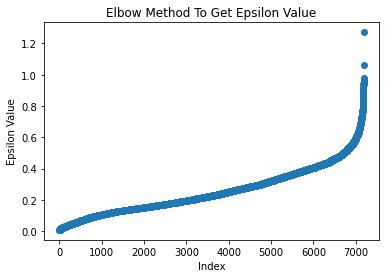

In [82]:
plt.plot(list(distances_df.index) ,list(distances_df['distances']), marker='o', linestyle='none')
plt.xlabel("Index")
plt.ylabel("Epsilon Value")
plt.title("Elbow Method To Get Epsilon Value")
plt.show()